In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imdb_reviews=pd.read_excel("/content/drive/MyDrive/Datasets/IMDB Movie Reviews .xlsx")

In [4]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
imdb_reviews[['Revenue (Millions)','Metascore']].describe()

,Revenue (Millions),Metascore
count,872.000000,936.000000
mean,82.956376,58.985043
std,103.253540,17.194757
min,0.000000,11.000000
25%,13.270000,47.000000
50%,47.985000,59.500000
75%,113.715000,72.000000
max,936.630000,100.000000


In [6]:
nacols=['Revenue (Millions)','Metascore']

In [7]:
for col in nacols:
    imdb_reviews[col]=imdb_reviews[col].fillna(imdb_reviews[col].median())

In [8]:
#Text Column
imdb_txt=imdb_reviews.Description

In [9]:
imdb_txt=imdb_txt.str.lower()

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
stop_english=set(stopwords.words("english"))

In [16]:
from nltk.tokenize import word_tokenize

In [19]:
imdb_txt=imdb_txt.apply(word_tokenize)

In [20]:
imdb_txt=imdb_txt.apply(lambda x:[w for w in x
                                          if w not in stop_english])

In [21]:
imdb_txt.head()

0    [group, intergalactic, criminals, forced, work...
1    [following, clues, origin, mankind, ,, team, f...
2    [three, girls, kidnapped, man, diagnosed, 23, ...
3    [city, humanoid, animals, ,, hustling, theater...
4    [secret, government, agency, recruits, dangero...
Name: Description, dtype: object

In [22]:
from wordcloud import WordCloud

In [23]:
wordcloud=WordCloud(height=500,width=1000,stopwords=stop_english).generate(str(imdb_txt))

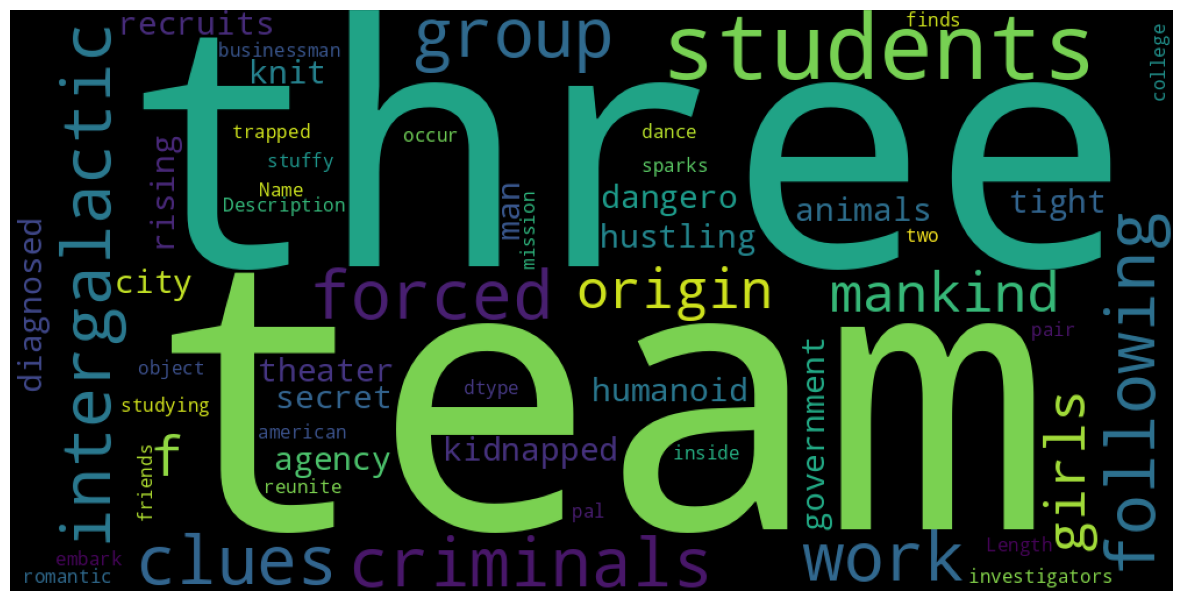

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
imbd_words=imdb_txt.to_list()

In [26]:
from nltk import flatten

In [27]:
imbd_words=flatten(imbd_words)

In [28]:
imbd_words=[ w for w in imbd_words if len(w)>2]

In [29]:
imbd_words=[ w for w in imbd_words if not w in ['...','u.s.']]

In [30]:
from nltk.probability import FreqDist

In [31]:
FreqDist(imbd_words).most_common(100)

[('young', 127),
 ('new', 106),
 ('life', 101),
 ('world', 95),
 ('two', 80),
 ('man', 79),
 ('must', 69),
 ('family', 66),
 ('woman', 63),
 ('one', 62),
 ('story', 56),
 ('find', 55),
 ('finds', 52),
 ('love', 52),
 ('friends', 51),
 ('mysterious', 49),
 ('group', 48),
 ('home', 46),
 ('school', 44),
 ('girl', 44),
 ('father', 39),
 ('war', 39),
 ('team', 38),
 ('lives', 38),
 ('help', 38),
 ('order', 37),
 ('back', 36),
 ('years', 35),
 ('city', 33),
 ('becomes', 33),
 ('together', 32),
 ('agent', 32),
 ('wife', 31),
 ('three', 30),
 ('save', 30),
 ('become', 30),
 ('former', 30),
 ('take', 30),
 ('discover', 30),
 ('american', 29),
 ('time', 29),
 ('takes', 28),
 ('boy', 28),
 ('high', 28),
 ('mother', 28),
 ('son', 28),
 ('friend', 28),
 ('fight', 27),
 ('get', 27),
 ('forced', 26),
 ('mission', 26),
 ('best', 25),
 ('daughter', 25),
 ('journey', 25),
 ('forces', 25),
 ('way', 25),
 ('death', 24),
 ('set', 24),
 ('see', 24),
 ('stop', 23),
 ('past', 23),
 ('full', 23),
 ('town', 23

In [32]:
imdb_txt=imdb_reviews.Description

In [33]:
imdb_txt=pd.DataFrame(imdb_txt,columns=['Description'])

In [34]:
imdb_txt.Description=imdb_txt.Description.apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_english)]))

In [35]:
imdb_txt.Description=imdb_txt.Description.apply(lambda x: ' '.join(
    [word for word in x.split() if len(word)>2]))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
DTM=CountVectorizer(max_features=100,ngram_range=(2,2))

In [38]:
X_DTM=DTM.fit_transform(imdb_txt.Description)

In [39]:
X_DTM=pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_)

In [40]:
imdb_reviews.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [41]:
numcols=imdb_reviews[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)','Metascore']]

In [42]:
numcols.corr()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Runtime (Minutes),1.000000,0.392214,0.407062,0.272955,0.202079
Rating,0.392214,1.000000,0.511537,0.218448,0.604522
Votes,0.407062,0.511537,1.000000,0.638758,0.317268
Revenue (Millions),0.272955,0.218448,0.638758,1.000000,0.141381
Metascore,0.202079,0.604522,0.317268,0.141381,1.000000


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
numcols_scaled=scaler.fit_transform(numcols)

In [46]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [47]:
X=pd.concat([X_DTM,numcols_scaled],axis=1)

In [48]:
from sklearn.cluster import KMeans

In [49]:
# Find Optimal Number of Clusters using Elbow Plot using WCSS - Within Cluster Sum Square Error
wcss_list=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

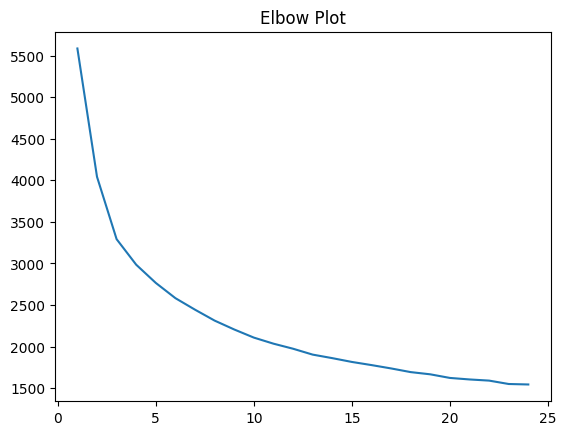

In [50]:
plt.plot(range(1,25),wcss_list)
plt.title('Elbow Plot')
plt.show()

In [51]:
clust4=KMeans(n_clusters=2)

In [52]:
clust4model=clust4.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(X,clust4model.labels_)

0.2778846352033548

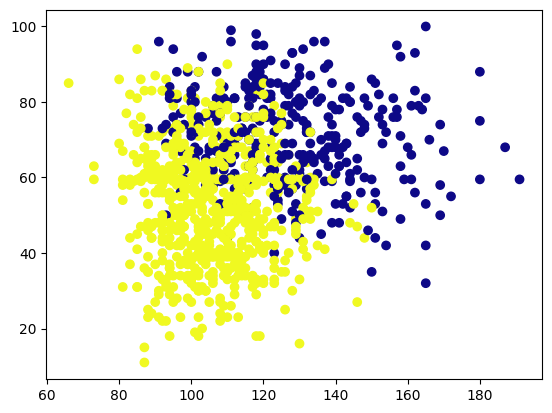

In [55]:
plt.scatter(x=numcols['Runtime (Minutes)'],y=numcols['Metascore'],c=clust4model.labels_,cmap='plasma')

In [56]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [57]:
X_euclid=euclidean_distances(X)

<ipython-input-58-269424bf72dc>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram=sch.dendrogram(sch.linkage(X_euclid,method="ward"),orientation='left',


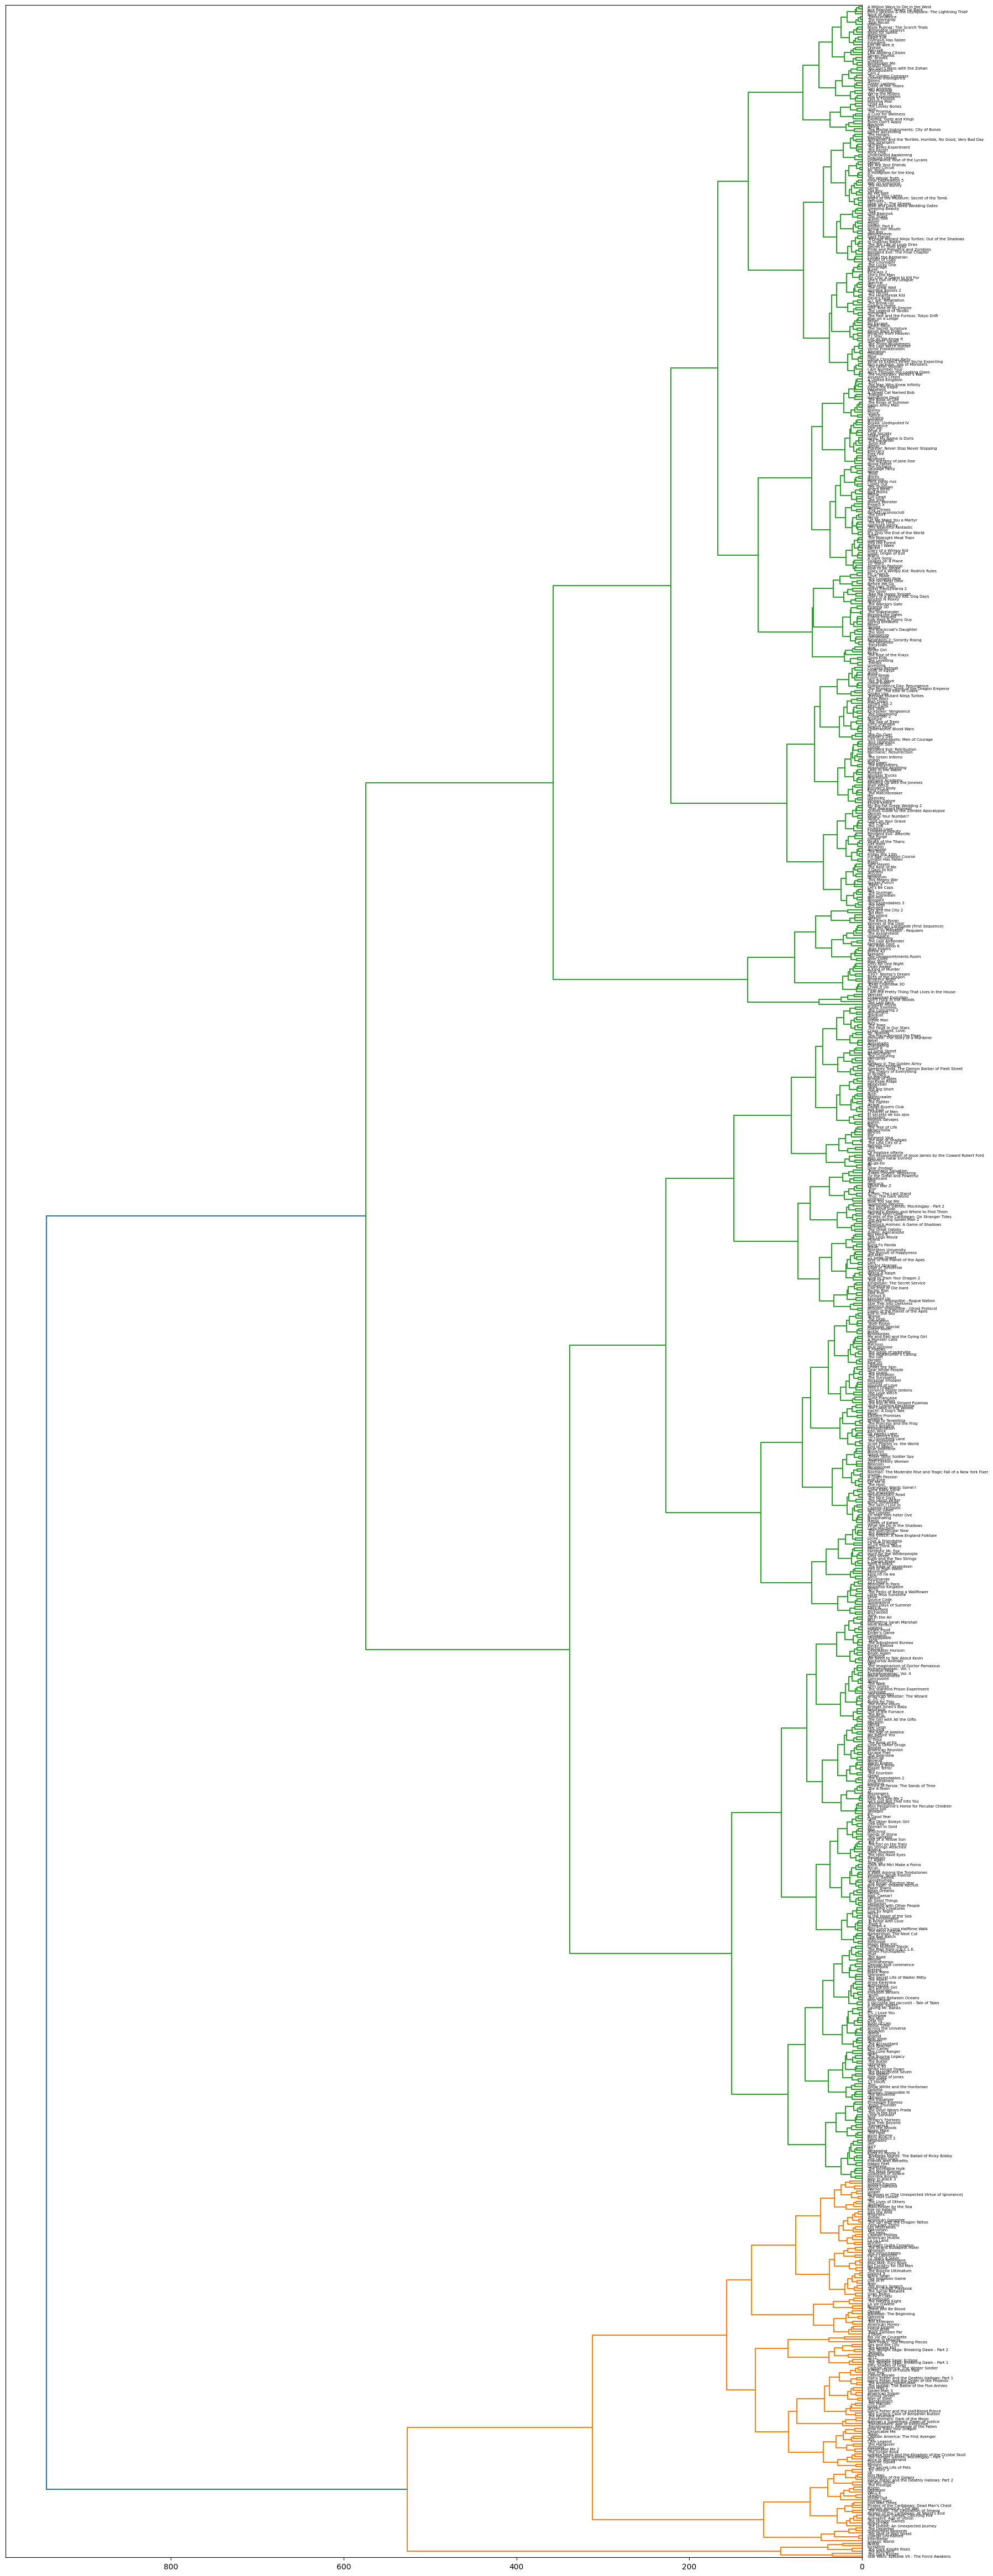

In [58]:
plt.figure(figsize=(20,60))
dendogram=sch.dendrogram(sch.linkage(X_euclid,method="ward"),orientation='left',
                         labels=imdb_reviews.Title.values.tolist(),p=200)